<a href="https://colab.research.google.com/github/raflymrm09/Model-Warna/blob/main/Ubah_Gambar_6_Mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Selamat Datang di Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Baru&#41; Coba Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


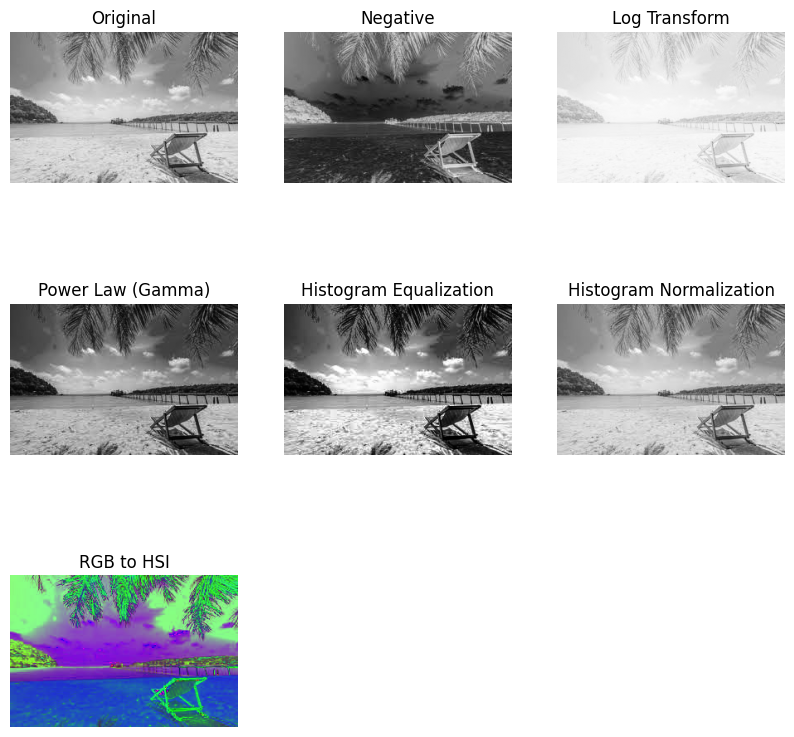

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dalam satu figure
def show_all_transformations(original, negative, log_transformed, power_transformed, hist_equalized, hist_normalized, hsi):
    titles = ['Original', 'Negative', 'Log Transform', 'Power Law (Gamma)', 'Histogram Equalization', 'Histogram Normalization', 'RGB to HSI']
    images = [original, negative, log_transformed, power_transformed, hist_equalized, hist_normalized, hsi]

    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load Gambar (Gantilah path sesuai lokasi file kamu)
image_path = "/content/download.jpg"  # Sesuaikan path ini
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 1. Citra Negatif
negative_image = 255 - image

# 2. Transformasi Log
c = 255 / np.log(1 + np.max(image))
log_image = c * np.log(1 + image.astype(np.float32))
log_image = np.uint8(log_image)

# 3. Transformasi Power Law (Gamma)
gamma = 2.0  # Bisa diubah sesuai kebutuhan
c = 255 / (np.max(image) ** gamma)
power_image = c * (image.astype(np.float32) ** gamma)
power_image = np.uint8(power_image)

# 4. Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# 5. Histogram Normalization
normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# 6. Konversi RGB ke HSI
def rgb_to_hsi(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255

    R, G, B = cv2.split(img)

    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(num / (den + 1e-6))

    H = np.where(B > G, 2 * np.pi - theta, theta) / (2 * np.pi) * 255
    S = 1 - 3 * np.minimum(R, np.minimum(G, B)) / (R + G + B + 1e-6)
    I = (R + G + B) / 3

    HSI = cv2.merge([H, S * 255, I * 255])
    return np.uint8(HSI)

hsi_image = rgb_to_hsi(image_path)

# Tampilkan Semua Gambar
show_all_transformations(image, negative_image, log_image, power_image, equalized_image, normalized_image, hsi_image)


Jika Anda sudah terbiasa dengan Colab, tonton video ini untuk mempelajari tabel interaktif, tampilan histori kode yang dieksekusi, dan palet perintah.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  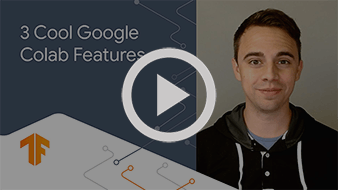
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Apa itu Colab?</h2>
</div>

Colab, atau "Colaboratory", memungkinkan Anda menulis dan mengeksekusi Python di browser, dengan
- Tidak memerlukan konfigurasi
- Akses tanpa biaya ke GPU
- Berbagi dengan mudah

Apakah Anda seorang <strong>pelajar</strong>, <strong>data scientist</strong>, atau <strong>peneliti AI</strong>, Colab dapat memudahkan pekerjaan Anda. Tonton <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Pengantar Colab</a> untuk mempelajari lebih lanjut, atau langsung mulai di bawah ini.

<div class="markdown-google-sans">

## <strong>Memulai</strong>
</div>

Dokumen yang sedang Anda baca bukan halaman statis. Ini media interaktif bernama <strong>notebook Colab</strong> yang memungkinkan Anda menulis dan mengeksekusi kode.

Misalnya, berikut ini <strong>kode sel</strong> dengan skrip Python pendek yang mengomputasi sebuah nilai, menyimpannya dalam suatu variabel, dan mencetak hasilnya:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Untuk mengeksekusi kode dalam sel di atas, pilih kode tersebut dengan mengkliknya, kemudian tekan tombol putar di sebelah kiri kode atau gunakan pintasan keyboard "Command/Ctrl+Enter". Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

Variabel yang Anda tentukan dalam sebuah sel nantinya dapat digunakan di sel lain:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Notebook Colab memungkinkan Anda menggabungkan <strong>kode yang dapat dijalankan</strong> dan <strong>rich text</strong> dalam satu dokumen, beserta <strong>gambar</strong>, <strong>HTML</strong>, <strong>LaTeX</strong>, dan lainnya. Saat Anda membuat notebook Colab Anda sendiri, notebook tersebut akan disimpan di akun Google Drive Anda. Anda dapat dengan mudah membagikan notebook Colab Anda dengan rekan kerja atau teman, sehingga memungkinkan mereka memberikan komentar di notebook Anda atau bahkan mengeditnya. Untuk mempelajari lebih lanjut, buka <a href="/notebooks/basic_features_overview.ipynb">Ringkasan Colab</a>. Untuk membuat notebook Colab baru, Anda dapat menggunakan menu File di atas, atau menggunakan link berikut: <a href="http://colab.research.google.com#create=true">buat notebook Colab baru</a>.

Notebook Colab adalah notebook Jupyter yang dihosting oleh Colab. Untuk mempelajari project Jupyter lebih lanjut, buka <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ilmu data
</div>

Dengan Colab, Anda dapat memanfaatkan kecanggihan library Python yang populer untuk menganalisis dan memvisualisasikan data. Sel kode di bawah menggunakan <strong>numpy</strong> untuk menghasilkan beberapa data acak, dan menggunakan <strong>matplotlib</strong> untuk memvisualisasikannya. Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

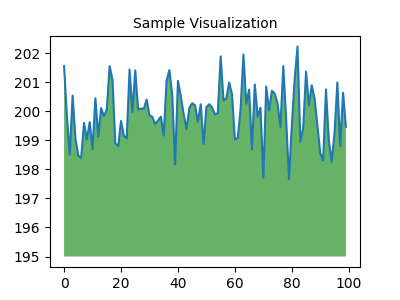

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Anda dapat mengimpor data sendiri ke notebook Colab dari akun Google Drive Anda, termasuk dari spreadsheet, GitHub, dan berbagai sumber lainnya. Untuk mempelajari lebih lanjut pengimporan data dan bagaimana Colab dapat digunakan untuk ilmu data, lihat link di bawah pada bagian <a href="#working-with-data">Bekerja dengan Data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Dengan Colab Anda dapat mengimpor set data gambar, melatih pengklasifikasi gambar pada gambar tersebut, dan mengevaluasi model, semuanya hanya dengan <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">beberapa baris kode</a>. Notebook Colab mengeksekusi kode pada server cloud Google. Itu artinya Anda dapat memanfaatkan kecanggihan hardware Google, termasuk <a href="#using-accelerated-hardware">GPU dan TPU</a>, terlepas dari mesin yang Anda gunakan. Yang Anda butuhkan hanyalah browser.

Colab digunakan secara luas di komunitas machine learning dengan berbagai penerapan meliputi:
- Memulai TensorFlow
- Mengembangkan dan melatih jaringan neural
- Bereksperimen dengan TPU
- Menyebarkan riset AI
- Membuat tutorial

Untuk melihat sampel notebook Colab yang menunjukkan penerapan machine learning, lihat <a href="#machine-learning-examples">contoh machine learning</a> di bawah.

<div class="markdown-google-sans">

## Referensi Lainnya

### Bekerja dengan Notebook di Colab

</div>

- [Ringkasan Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Panduan tentang Markdown](/notebooks/markdown_guide.ipynb)
- [Mengimpor library dan menginstal dependensi](/notebooks/snippets/importing_libraries.ipynb)
- [Menyimpan dan memuat notebook di GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulir interaktif](/notebooks/forms.ipynb)
- [Widget interaktif](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Bekerja dengan Data
</div>

- [Memuat data: Drive, Spreadsheet, dan Google Cloud Storage](/notebooks/io.ipynb)
- [Diagram: memvisualisasikan data](/notebooks/charts.ipynb)
- [Memulai BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Kursus Singkat Machine Learning

<div>

Berikut adalah beberapa notebook dari kursus Machine Learning online Google. Untuk info selengkapnya, buka <a href="https://developers.google.com/machine-learning/crash-course/">situs kursus lengkap</a>.
- [Pengantar Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresi linear dengan tf.keras menggunakan data sintetis](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Menggunakan Hardware yang Diakselerasi
</div>

- [TensorFlow dengan GPU](/notebooks/gpu.ipynb)
- [TensorFlow dengan TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Contoh bagus

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Gunakan Toolkit AI percakapan NeMo Nvidia untuk menukar suara dalam fragmen audio dengan suara yang dihasilkan komputer.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Melatih Kembali Pengklasifikasi Gambar</a>: Membangun model Keras di atas pengklasifikasi gambar yang telah terlatih untuk membedakan berbagai bunga.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Klasifikasi Teks</a>: Mengklasifikasikan ulasan film IMDB, baik sebagai <em>positif</em> ataupun <em>negatif</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfer Gaya</a>: Menggunakan deep learning untuk mentransfer gaya antar-gambar.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Tanya Jawab Encoder Kalimat Universal Multibahasa</a>: Menggunakan model machine learning untuk menjawab pertanyaan dari set data SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Jenis Interpolasi Video</a>: Memprediksi apa yang terjadi dalam suatu video antara bingkai pertama dan terakhir.
